In [130]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import metrics

1. IMPORT DATASET

In [131]:
#a/ Load the data set
df = pd.read_excel("Data_AIL.xlsx")
df.head()

,e,no. video,Student ID,Full name,id,standardized dish,dish occurence (based on transcript),dish imply,start time,end time,...,sauce (based on transcript),venue,container,describe how to make it,viewer feeling of youtuber's style,viewer feeling of presented food,YouTuber feeling,location,foreigner,Unnamed: 24
0,1.0,51.0,NaN,NaN,5OzrpNCyXqs,snail vermicelli soup,bun oc,NaN,1:05,3:21,...,NaN,street restaurant,bowl,1.0,4.0,NaN,5.0,HN,1.0,NaN
1,2.0,51.0,NaN,NaN,5OzrpNCyXqs,vermicelli with fried tofu and shrimp paste,bun dau mam tom,NaN,3:32,6:10,...,"fish sauce, fermented shrimp paste, pepper, ch...",street restaurant,tray,1.0,4.0,NaN,4.0,HN,1.0,NaN
2,3.0,51.0,NaN,NaN,5OzrpNCyXqs,fried spring roll,spring roll,NaN,5:23,6:10,...,"fish sauce, sweet spicy garlic sauce",street restaurant,plate,0.0,5.0,NaN,5.0,HN,1.0,NaN
3,4.0,51.0,NaN,NaN,5OzrpNCyXqs,steamed rolled rice pancake,banh cuon,NaN,6:22,9:23,...,"garlic water, fried caramelized scallion, pepp...",street restaurant,plate,1.0,5.0,NaN,5.0,HN,1.0,NaN
4,5.0,51.0,NaN,NaN,5OzrpNCyXqs,shrimp cake,shrimp cake,NaN,9:42,11:55,...,"chili, sweet spicy sauce",street restaurant,plate,1.0,4.0,NaN,5.0,HN,1.0,NaN


In [132]:
new_feature = "container"
new_feature2 = "venue"

In [133]:
#b/ Select features
data = df[["start time","end time","Unnamed: 11","viewer feeling of youtuber's style ",new_feature, new_feature2]]

In [134]:
data= data.dropna(axis= 0)
data.describe()

,Unnamed: 11
count,3681.000000
mean,3.295844
std,2.817879
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,20.000000


In [135]:
#convert categorize collumns to numbers
le = LabelEncoder()
data[new_feature] = le.fit_transform(data[new_feature])
data[new_feature2] = le.fit_transform(data[new_feature2])

In [136]:
# convert start time and end time to seconds
import re
def __check_value_time(hours=0, minutes=0, seconds=0):
    # print('Time out: 'hours, minutes, seconds)
    if hours > 24:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Hour is out of range')

    if seconds > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Second is out of range')

    if minutes > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Minutes is out of range')

def process_time_str(time_str):
    time_data = re.findall('[0-9]?[0-9]', time_str)
    TIME_WITH_HOUR = 3
    TIME_WITH_MINUTES = 2
    TIME_WITH_SECONDS = 1
    MAX_SECONDS = 90060
    # print(time_data)
    if len(time_data) == TIME_WITH_HOUR:
        hours = int(time_data[0])
        minutes = int(time_data[1])
        seconds = int(time_data[2])

        __check_value_time(hours, seconds, minutes)

        return (hours*3600 + minutes*60 + seconds)
    if len(time_data) == TIME_WITH_MINUTES:
        minutes = int(time_data[0])
        seconds = int(time_data[1])

        __check_value_time(minutes=minutes, seconds=seconds)

        return (minutes*60 + seconds)
    if len(time_data) == TIME_WITH_SECONDS:
        seconds = int(time_data[0])

        __check_value_time(seconds=seconds)

        return seconds

In [137]:
index_data = list()
for str_time in data['start time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)

data = data[index_data]

index_data = list()
for str_time in data['end time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)
data = data[index_data]
df_time = list()

for start_time, end_time in zip(data['start time'], data['end time']):
    df_time.append((process_time_str(start_time), process_time_str(end_time)))

data[['start time', 'end time']] = df_time
data["viewer feeling of youtuber's style "] = data["viewer feeling of youtuber's style "].astype('int')


In [138]:
data['duration'] = data['end time']- data['start time']

In [139]:
data= data.loc[data['duration']>=0]
data = data.loc[data["viewer feeling of youtuber's style "]!=0]
data.head()

,start time,end time,Unnamed: 11,viewer feeling of youtuber's style,container,venue,duration
0,65,201,9,4,3,5,136
1,212,370,11,4,15,5,158
2,323,370,4,5,13,5,47
3,382,563,5,5,13,5,181
4,582,715,4,4,13,5,133


<AxesSubplot:title={'center':'Weight of class'}, ylabel='duration'>

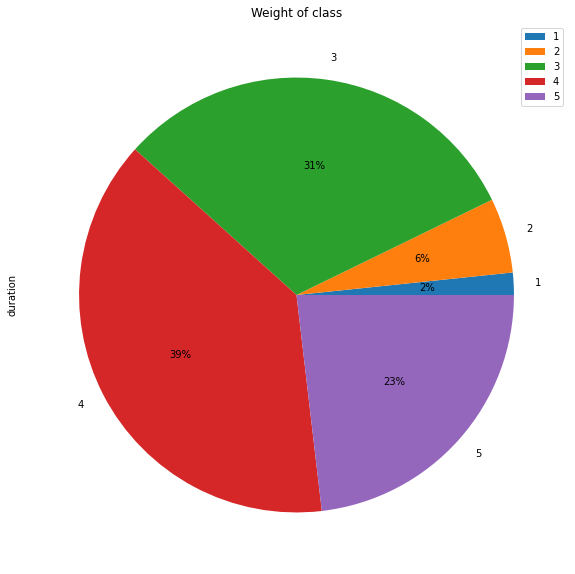

In [140]:
# Plotting the pie chart for above dataframe
data.groupby(["viewer feeling of youtuber's style "]).count().plot(kind='pie',y = "duration", autopct='%1.0f%%',figsize=(15,10), title= "Weight of class")

In [141]:
# Normalization
data['duration'] = (data['duration']-data['duration'].mean())/(data['duration'].max()- data['duration'].min())
data['Unnamed: 11'] = (data['Unnamed: 11']-data['Unnamed: 11'].mean())/(data['Unnamed: 11'].max() - data['Unnamed: 11'].min())
data[new_feature] = (data[new_feature]-data[new_feature].mean())/(data[new_feature].max() - data[new_feature].min())
data[new_feature2] = (data[new_feature2]-data[new_feature2].mean())/(data[new_feature2].max() - data[new_feature2].min())

# Phân loại 
input_data = data[['duration', 'Unnamed: 11',new_feature,new_feature2]]
output_data = data["viewer feeling of youtuber's style "]

<AxesSubplot:>

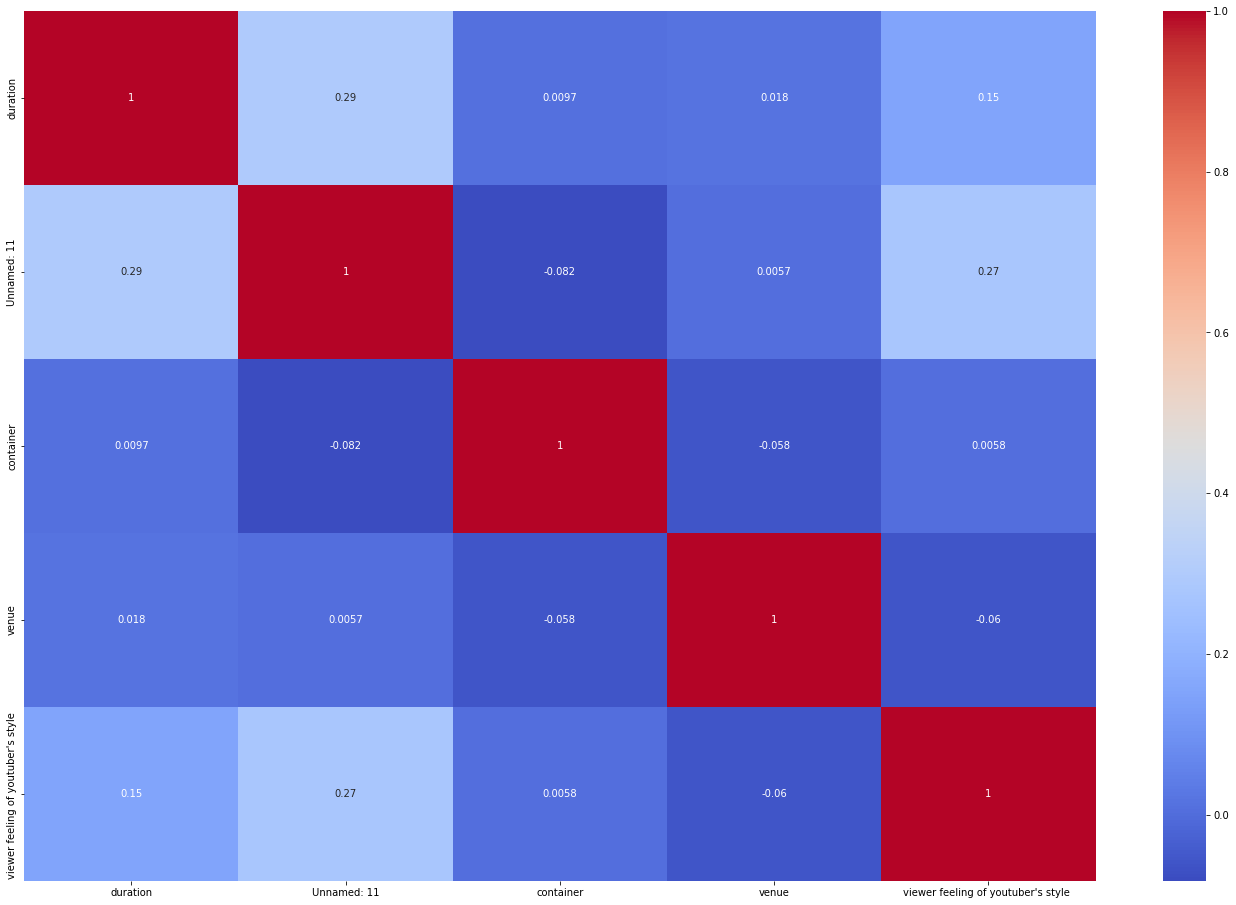

In [142]:
#Plot correlation matrix
plt.figure(figsize = (24,16))
sns.heatmap(pd.concat([input_data,output_data], axis=1).corr(), annot=True, cmap="coolwarm")

<AxesSubplot:>

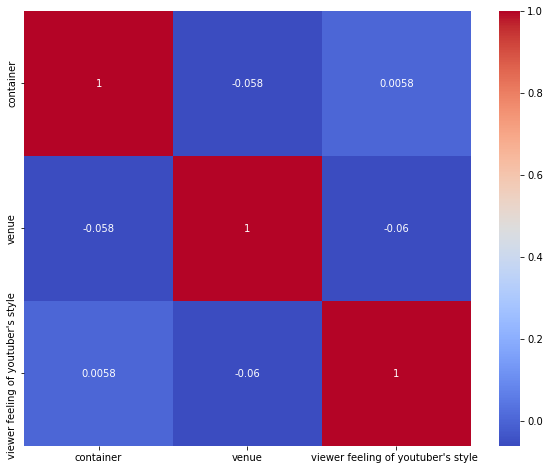

In [143]:
plt.figure(figsize = (10,8))
sns.heatmap(pd.concat([input_data[[new_feature,new_feature2]],output_data], axis=1).corr(), annot=True, cmap="coolwarm")

Text(0, 0.5, "Viewer's feeling")

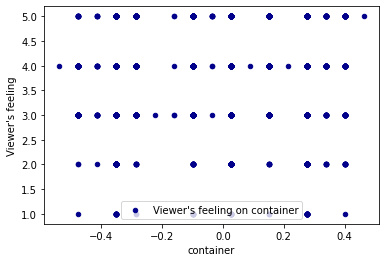

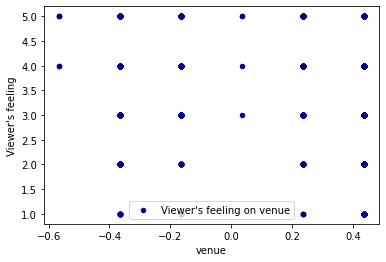

In [144]:
ax1 = data.plot.scatter(x=new_feature, y="viewer feeling of youtuber's style ", color="DarkBlue", label="Viewer's feeling on "+ new_feature)
ax1.set_xlabel(new_feature)
ax1.set_ylabel("Viewer's feeling")
ax2 = data.plot.scatter(x=new_feature2, y="viewer feeling of youtuber's style ", color="DarkBlue", label="Viewer's feeling on "+ new_feature2)
ax2.set_xlabel(new_feature2)
ax2.set_ylabel("Viewer's feeling")

Text(0, 0.5, 'Number of ingredients')

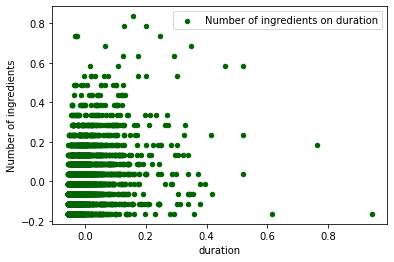

In [145]:
ax3 = data.plot.scatter(x="duration", y='Unnamed: 11', color="Darkgreen", label= "Number of ingredients on duration")
ax3.set_xlabel("duration")
ax3.set_ylabel("Number of ingredients")

In [146]:
#convert to numpy
x=input_data.to_numpy()
y=output_data.to_numpy()


In [147]:
feature = pd.DataFrame({"Viewer's feeling": y,"duration":x[:,0],"Number of ingredient":x[:,1],"container":x[:,2],"venue":x[:,3]})
feature.head()


,Viewer's feeling,duration,Number of ingredient,container,venue
0,4,0.025549,0.285,-0.349742,0.435482
1,4,0.038786,0.385,0.400258,0.435482
2,5,-0.028001,0.035,0.275258,0.435482
3,5,0.052624,0.085,0.275258,0.435482
4,4,0.023744,0.035,0.275258,0.435482


In [148]:

#c/ Split it into two parts: 70% of which you will use to train your model and the remaining data will be used to test the model.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [149]:
print(x_train.shape)
print(x_test.shape)

(2541, 4)
(1089, 4)


3. SVM

In [150]:
from sklearn import svm
from sklearn import metrics
#Create a svm Classifier
clf = svm.SVC() # default Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.418732782369146


In [151]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Grid Search

In [152]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
# Define the grid
param_grid = [
    {'C': [ 0.1, 1, 50, 100 ,200, 400 ],'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf','poly']}
]
# Instantiate GridSearchCV
model_gridsearch = GridSearchCV(estimator=clf,
                                param_grid=param_grid,
                                scoring='accuracy',
                                n_jobs=4,
                                cv=5,
                                refit=True,
                                return_train_score=True
                                )
# Record the current time              
start = time()

# Fit the selected model
model_gridsearch.fit(x_train, y_train)

# Print the time spend and number of models ran
print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % ((time() - start), len(model_gridsearch.cv_results_['params'])))


GridSearchCV took 26.41 seconds for 22 candidate parameter settings.


In [153]:
# Predict on the test set and call accuracy
y_pred_grid = model_gridsearch.predict(x_test)
accuracy_grid = metrics.accuracy_score(y_test, y_pred_grid)
print(accuracy_grid)

0.43526170798898073


In [154]:
print(model_gridsearch.best_params_)

{'C': 200, 'kernel': 'rbf'}


In [155]:
#compare
result = pd.DataFrame({'Actual Value':y_test.reshape(y_test.shape[0],),'Predicted Value':y_pred_grid.reshape(y_pred_grid.shape[0],),"Difference": (y_test - y_pred_grid).reshape(y_test.shape[0])})
result[0:20]

,Actual Value,Predicted Value,Difference
0,3,3,0
1,4,4,0
2,3,3,0
3,3,4,-1
4,3,3,0
5,3,4,-1
6,4,4,0
7,4,4,0
8,5,4,1
9,5,3,2


Random Search


In [161]:
import scipy
from sklearn.model_selection import RandomizedSearchCV
# specify distributions to sample from
from sklearn.utils.fixes import loguniform

param_dist = {'C': scipy.stats.expon(scale=100), 
              'gamma': scipy.stats.expon(scale=.1),
              'kernel': ['rbf','poly']}

# specify number of search iterations
n_iter_search = 50

# Instantiate RandomSearchCV
model_random_search = RandomizedSearchCV(estimator=clf,
                                         param_distributions=param_dist,
                                         n_iter=n_iter_search)

# Record the current time
start = time()

# Fit the selected model
model_random_search.fit(x_train, y_train)

# Print the time spend and number of models ran
print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 68.69 seconds for 50 candidate parameter settings.


In [162]:
# Predict on the test set and call accuracy
y_pred_random = model_random_search.predict(x_test)
accuracy_random = metrics.accuracy_score(y_test, y_pred_random)
print(accuracy_random)


0.4214876033057851


In [163]:
print(model_random_search.best_params_)

{'C': 232.40076167416785, 'gamma': 0.2876140350525856, 'kernel': 'rbf'}


In [164]:
#compare
result = pd.DataFrame({'Actual Value':y_test.reshape(y_test.shape[0],),'Predicted Value':y_pred_random.reshape(y_pred_grid.shape[0],),"Difference": (y_test - y_pred_random).reshape(y_test.shape[0])})
result[0:20]

,Actual Value,Predicted Value,Difference
0,3,3,0
1,4,4,0
2,3,3,0
3,3,4,-1
4,3,3,0
5,3,4,-1
6,4,4,0
7,4,3,1
8,5,4,1
9,5,3,2
